Due to various read in errors (and now with more experience) I want to take a look at the raw dataset to make sure none of the issues are due to inconsistiencies with the data.

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read csv file into a pandas dataframe
books_df = pd.read_csv('main_dataset.csv')
books_df.head()

,image,name,author,format,book_depository_stars,price,currency,old_price,isbn,category,img_paths
0,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,This is Going to Hurt,Adam Kay,Paperback,4.5,7.6,$,11.4,9781509858637,Medical,dataset/Medical/0000001.jpg
1,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,"Thinking, Fast and Slow",Daniel Kahneman,Paperback,4.0,11.5,$,15.0,9780141033570,Medical,dataset/Medical/0000002.jpg
2,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,When Breath Becomes Air,Paul Kalanithi,Paperback,4.5,9.05,$,11.5,9781784701994,Medical,dataset/Medical/0000003.jpg
3,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,The Happiness Trap,Russ Harris,Paperback,4.0,8.34,$,13.9,9781845298258,Medical,dataset/Medical/0000004.jpg
4,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Man's Search For Meaning,Viktor E. Frankl,Paperback,4.5,9.66,$,NaN,9781846041242,Medical,dataset/Medical/0000005.jpg


In [4]:
# drop categories that are not needed for library database
drop_cols = ['image', 'format', 'price', 'currency', 'old_price', 'img_paths']
books_df.drop(columns= drop_cols, inplace= True)
books_df.head(2)

,name,author,book_depository_stars,isbn,category
0,This is Going to Hurt,Adam Kay,4.5,9781509858637,Medical
1,"Thinking, Fast and Slow",Daniel Kahneman,4.0,9780141033570,Medical


In [5]:
# check datatypes
books_df.dtypes

name                      object
author                    object
book_depository_stars    float64
isbn                       int64
category                  object
dtype: object

In [7]:
# check for null values
books_df.isna().sum()

name                       0
author                   198
book_depository_stars      0
isbn                       0
category                   0
dtype: int64

We have found a problem! Nearly 200 books are missing an author. I did not account for this when I originally programmed and set up my database. This could be the cause of some of the read-in errors.

Since this project is only for exploratory purposes, I am simply going to drop the rows with the missing author data.

In [8]:
books_df.dropna(inplace= True)
books_df.isna().sum()

name                     0
author                   0
book_depository_stars    0
isbn                     0
category                 0
dtype: int64

Visually inspect the distribution of the categories.

In [59]:
# identify unique categories
books_df['category'].unique(), len(books_df['category'].unique())

(array(['Medical', 'Science-Geography', 'Art-Photography', 'Biography',
        'Business-Finance-Law', 'Childrens-Books', 'Computing',
        'Crafts-Hobbies', 'Crime-Thriller', 'Dictionaries-Languages',
        'Entertainment', 'Food-Drink', 'Graphic-Novels-Anime-Manga',
        'Health', 'History-Archaeology', 'Home-Garden', 'Humour',
        'Mind-Body-Spirit', 'Natural-History', 'Personal-Development',
        'Poetry-Drama', 'Reference', 'Religion', 'Romance',
        'Science-Fiction-Fantasy-Horror', 'Society-Social-Sciences',
        'Sport', 'Stationery', 'Teaching-Resources-Education',
        'Technology-Engineering', 'Teen-Young-Adult', 'Transport',
        'Travel-Holiday-Guides'], dtype=object),
 33)

In [60]:
# import additional library for visualization
import seaborn as sns

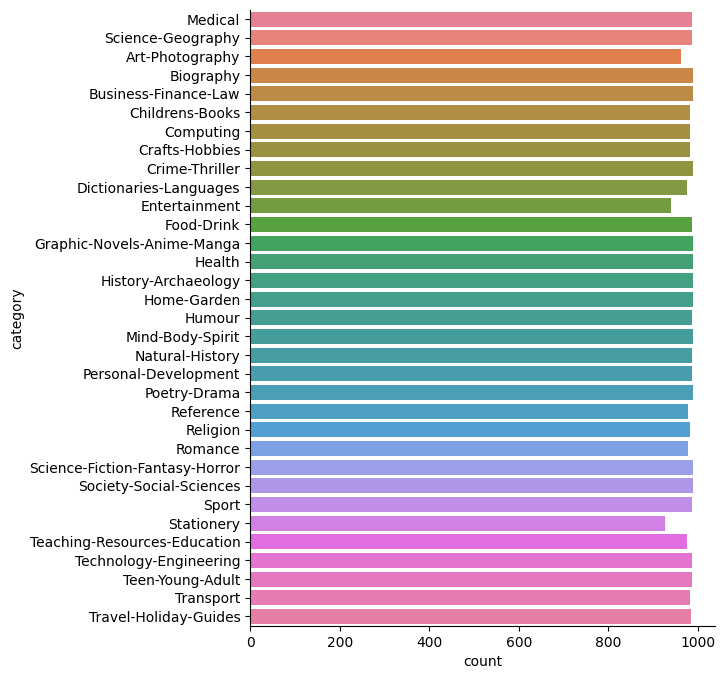

In [67]:
# show barchart for proportion of total count each category represents
f, ax = plt.subplots(figsize= (6, 8))
f = sns.countplot(data= books_df, y= 'category', hue = 'category', stat= 'count')
f = sns.despine(top= True)

plt.show(f);

All categories are represented equally in the dataset, with 'Stationery' and 'Entertainment' appearing to be the lowest two.

In [82]:
# view the lowest three categories
genres = books_df['category'].value_counts(sort= True, ascending= True)
genres[:3]

category
Stationery         926
Entertainment      940
Art-Photography    962
Name: count, dtype: int64

In [83]:
books_df.sample(10)

,name,author,book_depository_stars,isbn,category
3864,Wild,Cheryl Strayed,4.0,9780857897763,Biography
16140,Guardians of Being,Eckhart Tolle,4.5,9781608681198,Humour
21158,Edgar Cayce Encyclopedia of Healing,Reba Ann Karp,4.0,9780446608411,Reference
13326,Parenting from the Inside Out,Daniel J. Siegel,4.0,9781922247445,Health
3464,Empress Dowager Cixi,Jung Chang,4.0,9780099532392,Biography
19241,E-Squared,Pam Grout,4.0,9781401938901,Personal-Development
30570,Scythe,Neal Shusterman,4.5,9781442472426,Teen-Young-Adult
28606,"Words Their Way: Word Study for Phonics, Vocab...",Donald R. Bear,4.0,9781292107530,Teaching-Resources-Education
15750,Growing Media for Ornamental Plants and Turf,Kevin Handreck,4.5,9781742230825,Home-Garden
13100,Paleo Diet Cookbook,Loren Cordain,3.5,9780470913048,Health


This is all the EDA I am going to do for now. Next will be to save the newly cleaned data and then load that into the database, and then evaluate the database from there.

In [85]:
books_df.to_csv('main_dataset_revised_v2.csv')

In [86]:
plt.close('all')